In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
holidays_events        = pd.read_csv("../artifacts/holidays_events.csv")
oil                    = pd.read_csv("../artifacts/oil.csv")
sample_submission      = pd.read_csv("../artifacts/sample_submission.csv")
stores                 = pd.read_csv("../artifacts/stores.csv")
test                   = pd.read_csv("../artifacts/test.csv")
train                  = pd.read_csv("../artifacts/train.csv")
transactions           = pd.read_csv("../artifacts/transactions.csv")

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [6]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In below cells,
* we remove unwanted columns 
* we convert categorical data to numerical data

In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [9]:
stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

In [10]:
stores['cluster'].unique()

array([13,  8,  9,  4,  6, 15,  7,  3, 12, 16,  1, 10,  2,  5, 11, 14, 17],
      dtype=int64)

So, we need only 'cluster' column to use in prediction

In [11]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [12]:
holidays_events.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [13]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [14]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [15]:
condition = (holidays_events['transferred'] == True)
holidays_events = holidays_events.drop(holidays_events[condition].index)

In [16]:
holidays_events.describe()

,date,type,locale,locale_name,description,transferred
count,338,338,338,338,338,338
unique,300,6,3,24,103,1
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,209,166,166,10,338


In [17]:
print(holidays_events['locale'].unique())
print(holidays_events['type'].unique())
print(holidays_events['locale_name'].unique())

['Local' 'Regional' 'National']
['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
['Manta' 'Cotopaxi' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda'
 'Imbabura' 'Latacunga' 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe'
 'Esmeraldas' 'Ecuador' 'Ambato' 'Ibarra' 'Quevedo'
 'Santo Domingo de los Tsachilas' 'Santa Elena' 'Quito' 'Loja' 'Salinas'
 'Guayaquil']


## Remove unwanted columns

In [18]:
stores = stores.drop(columns=['city','state','type'])

In [19]:
holidays_events = holidays_events.drop(columns=['transferred','description','locale_name'])
holidays_events.head()

,date,type,locale
0,2012-03-02,Holiday,Local
1,2012-04-01,Holiday,Regional
2,2012-04-12,Holiday,Local
3,2012-04-14,Holiday,Local
4,2012-04-21,Holiday,Local


## Convert categorical -> numeric

In [20]:
stores.dtypes

store_nbr    int64
cluster      int64
dtype: object

In [21]:
oil.dtypes

date           object
dcoilwtico    float64
dtype: object

In [22]:
holidays_events.dtypes

date      object
type      object
locale    object
dtype: object

In [23]:
train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [24]:
test.dtypes

id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object

    One-hot encoding for holidays_events

In [25]:
encoded_columns = pd.get_dummies(holidays_events[['type', 'locale']], columns=['type', 'locale']).astype(int)
holidays_events = pd.concat([holidays_events['date'],encoded_columns], axis=1)

In [26]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 349
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             338 non-null    object
 1   type_Additional  338 non-null    int32 
 2   type_Bridge      338 non-null    int32 
 3   type_Event       338 non-null    int32 
 4   type_Holiday     338 non-null    int32 
 5   type_Transfer    338 non-null    int32 
 6   type_Work Day    338 non-null    int32 
 7   locale_Local     338 non-null    int32 
 8   locale_National  338 non-null    int32 
 9   locale_Regional  338 non-null    int32 
dtypes: int32(9), object(1)
memory usage: 17.2+ KB


## Merging the datasets

merge stores -> train

In [27]:
# merge stores -> train
train = pd.merge(train,stores,on='store_nbr',how='left')
test  = pd.merge(test,stores,on='store_nbr',how='left') 

merge oil -> train

In [28]:
# merge oil -> train
oil.rename(columns={'dcoilwtico':'oil_price'},inplace=True)
train = pd.merge(train,oil,on='date',how='left')
test  = pd.merge(test,oil,on='date',how='left') 

merge holidays_events -> train

In [29]:
# merge holidays_events -> train 
train = pd.merge(train,holidays_events,on='date',how='left')
test  = pd.merge(test,holidays_events,on='date',how='left') 

In [30]:
train

,id,date,store_nbr,family,sales,onpromotion,cluster,oil_price,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,13,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,2013-01-01,1,BABY CARE,0.000,0,13,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,2013-01-01,1,BEAUTY,0.000,0,13,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.000,0,13,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,2013-01-01,1,BOOKS,0.000,0,13,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,6,47.57,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,6,47.57,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,6,47.57,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,6,47.57,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
train.isnull().sum()

id                       0
date                     0
store_nbr                0
family                   0
sales                    0
onpromotion              0
cluster                  0
oil_price           955152
type_Additional    2567862
type_Bridge        2567862
type_Event         2567862
type_Holiday       2567862
type_Transfer      2567862
type_Work Day      2567862
locale_Local       2567862
locale_National    2567862
locale_Regional    2567862
dtype: int64

Convert date to dateTime datatype

In [32]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [33]:
# train.info()

## Filling missing values

In [34]:
# fill Null holidays with 0.0
train[['type_Additional', 'type_Bridge','type_Event', 'type_Holiday','type_Transfer', 'type_Work Day','locale_Local', 'locale_National','locale_Regional']] = train[['type_Additional', 'type_Bridge','type_Event', 'type_Holiday','type_Transfer', 'type_Work Day','locale_Local', 'locale_National','locale_Regional']].fillna(0.0)
test[['type_Additional', 'type_Bridge','type_Event', 'type_Holiday','type_Transfer', 'type_Work Day','locale_Local', 'locale_National','locale_Regional']] = test[['type_Additional', 'type_Bridge','type_Event', 'type_Holiday','type_Transfer', 'type_Work Day','locale_Local', 'locale_National','locale_Regional']].fillna(0.0)

In [35]:
# sort the dataframe by date
train = train.sort_values(by='date')
test  = test.sort_values(by='date')

# Fill missing values in 'oil_price' with the last valid value
train['oil_price'] = train['oil_price'].fillna(method='ffill')
test['oil_price'] = test['oil_price'].fillna(method='ffill')

In [36]:
train.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
cluster               0
oil_price          1782
type_Additional       0
type_Bridge           0
type_Event            0
type_Holiday          0
type_Transfer         0
type_Work Day         0
locale_Local          0
locale_National       0
locale_Regional       0
dtype: int64

In [37]:
train['oil_price'] = train['oil_price'].fillna(method='bfill')

In [38]:
train.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
cluster            0
oil_price          0
type_Additional    0
type_Bridge        0
type_Event         0
type_Holiday       0
type_Transfer      0
type_Work Day      0
locale_Local       0
locale_National    0
locale_Regional    0
dtype: int64

## Remove duplicates

In [39]:
train.duplicated().sum()

19602

In [40]:
test.duplicated().sum()

0

In [41]:
train = train.drop_duplicates()

In [42]:
train = train.drop(columns=['id','store_nbr','family'])
test = test.drop(columns=['id','store_nbr','family'])

Preprocessing is over.................

## Model creation

In [43]:
train.describe()

,date,sales,onpromotion,cluster,oil_price,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional
count,3034746,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06,3.034746e+06
mean,2015-04-25 21:52:19.166177792,3.587908e+02,2.614001e+00,8.481481e+00,6.785510e+01,2.231356e-02,1.761597e-03,3.229595e-02,8.925426e-02,5.284792e-03,2.935995e-03,6.165590e-02,8.162067e-02,1.056958e-02
min,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2014-02-28 00:00:00,0.000000e+00,0.000000e+00,4.000000e+00,4.632000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015-04-27 00:00:00,1.100000e+01,0.000000e+00,8.500000e+00,5.341000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2016-06-21 00:00:00,1.960000e+02,0.000000e+00,1.300000e+01,9.572000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2017-08-15 00:00:00,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,NaN,1.106772e+03,1.225351e+01,4.649735e+00,2.566105e+01,1.477013e-01,4.193441e-02,1.767850e-01,2.851104e-01,7.250424e-02,5.410523e-02,2.405296e-01,2.737860e-01,1.022637e-01


In [44]:
test.describe()

,date,onpromotion,cluster,oil_price,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional
count,28512,28512.000000,28512.000000,28512.000000,28512.0,28512.0,28512.0,28512.000000,28512.0,28512.0,28512.000000,28512.0,28512.0
mean,2017-08-23 12:00:00,6.965383,8.481481,47.462500,0.0,0.0,0.0,0.062500,0.0,0.0,0.062500,0.0,0.0
min,2017-08-16 00:00:00,0.000000,1.000000,45.960000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
25%,2017-08-19 18:00:00,0.000000,4.000000,47.002500,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
50%,2017-08-23 12:00:00,0.000000,8.500000,47.520000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
75%,2017-08-27 06:00:00,6.000000,13.000000,47.850000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
max,2017-08-31 00:00:00,646.000000,17.000000,48.590000,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0
std,NaN,20.683952,4.649816,0.790967,0.0,0.0,0.0,0.242066,0.0,0.0,0.242066,0.0,0.0


In [45]:
# date_rng_train = pd.date_range(start='2013-01-01', end='2017-08-15', freq='D')  # Daily date range
# df_train = pd.DataFrame(train, index=date_rng_train)
# date_rng_test = pd.date_range(start='2017-08-16', end='2017-08-31', freq='D')  # Daily date range
# df_test = pd.DataFrame(test, index=date_rng_test)

# # Resample the data to get monthly data
# monthly_data_for_train = df_train.resample('M').mean()  

# # Resample the data to get monthly data
# monthly_data_for_test = df_test.resample('M').mean()  

Plot Sales over time

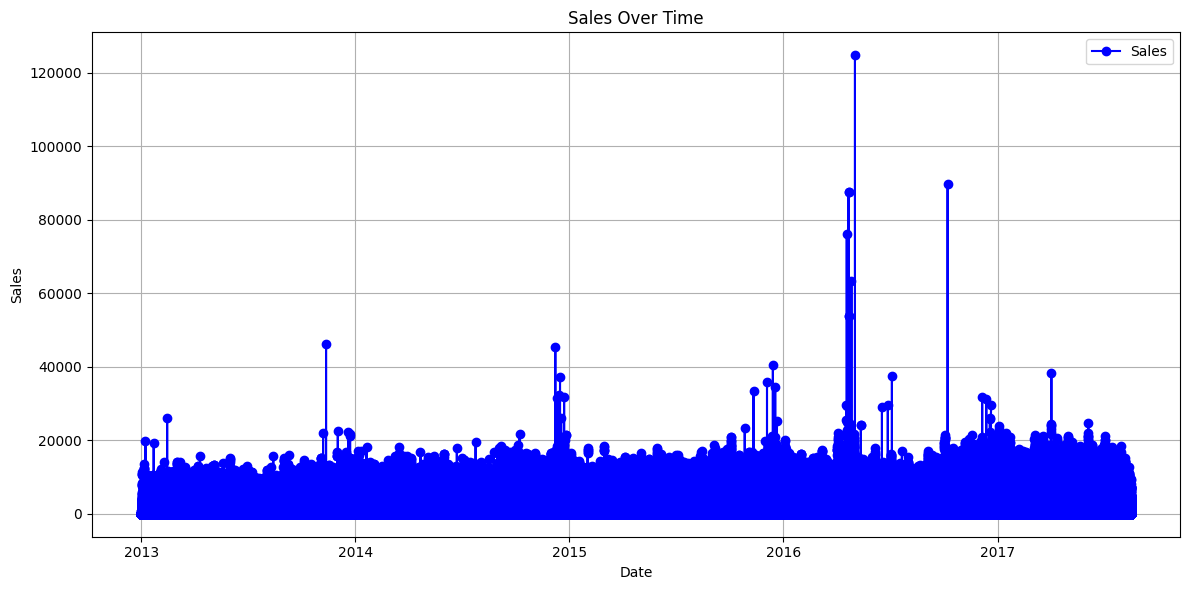

In [46]:
plt.figure(figsize=(12, 6))  
plt.plot(train.date, train['sales'], marker='o', linestyle='-', color='b', label='Sales')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()

plt.grid(True)  # Add a grid if needed
plt.tight_layout()  # Ensure the labels and title fit within the figure
plt.show()

In [47]:
# !pip install statsmodels

In [48]:
# # package to perform ADF test
# from statsmodels.tsa.stattools import adfuller
 
# # extracting only the passengers count using values function
# values = train.sales
 
# # passing the extracted passengers count to adfuller function.
# # result of adfuller function is stored in a res variable
# res = adfuller(values)
 
# # Printing the statistical result of the adfuller test
# print('Augmneted Dickey_fuller Statistic: %f' % res[0])
# print('p-value: %f' % res[1])
 
# # printing the critical values at different alpha levels.
# print('critical values at different levels:')
# for k, v in res[4].items():
#     print('\t%s: %.3f' % (k, v))

We can not perform augmented dickey-fuller test since it take so much memory

In [49]:
train

,date,sales,onpromotion,cluster,oil_price,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional
0,2013-01-01,0.000,0,13,93.14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1194,2013-01-01,0.000,0,2,93.14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1193,2013-01-01,0.000,0,2,93.14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1192,2013-01-01,0.000,0,2,93.14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1191,2013-01-01,0.000,0,2,93.14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053153,2017-08-15,3.000,0,1,47.57,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3053152,2017-08-15,93.000,8,1,47.57,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3053151,2017-08-15,180.107,0,1,47.57,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3053162,2017-08-15,0.000,0,10,47.57,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [50]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
train.set_index('date', inplace=True)

# Aggregate duplicate dates by summing sales
train_monthly = train.resample('M').sum()  

# Perform ETS decomposition
decomposition = seasonal_decompose(train_monthly['sales'], model='additive')

In [51]:
# Aggregate duplicate dates by summing sales
def custom_aggregation(series):
    return series.mean()

train_daily_without_oilprice = train.drop(columns=['oil_price']).resample('D').sum() 
daily_oil_price = train[['oil_price']].resample('D').mean() 

train_daily = pd.concat([train_daily_without_oilprice, daily_oil_price], axis=1)

In [52]:
train_daily

,sales,onpromotion,cluster,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional,oil_price
date,,,,,,,,,,,,,
2013-01-01,2511.618999,0,15114,0.0,0.0,0.0,1782.0,0.0,0.0,0.0,1782.0,0.0,93.14
2013-01-02,496092.417944,0,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.14
2013-01-03,361461.231124,0,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.97
2013-01-04,354459.677093,0,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.12
2013-01-05,477350.121229,0,15114,0.0,0.0,0.0,0.0,0.0,1782.0,0.0,1782.0,0.0,93.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,826373.722022,14179,15114,0.0,0.0,0.0,0.0,1782.0,0.0,0.0,1782.0,0.0,48.81
2017-08-12,792630.535079,8312,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.81
2017-08-13,865639.677471,9283,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.81


In [53]:
train_monthly

,sales,onpromotion,cluster,oil_price,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional
date,,,,,,,,,,,,,
2013-01-31,1.032762e+07,0,468534,5227675.20,0.0,0.0,0.0,1782.0,0.0,3564.0,0.0,5346.0,0.0
2013-02-28,9.658960e+06,0,423192,4760256.60,0.0,0.0,0.0,3564.0,0.0,0.0,0.0,3564.0,0.0
2013-03-31,1.142850e+07,0,468534,5149498.86,0.0,0.0,0.0,1782.0,0.0,0.0,1782.0,0.0,0.0
2013-04-30,1.099346e+07,0,453420,4907253.78,0.0,0.0,0.0,8910.0,0.0,0.0,5346.0,1782.0,1782.0
2013-05-31,1.198556e+07,0,483648,5399638.20,1782.0,0.0,1782.0,5346.0,0.0,0.0,1782.0,7128.0,0.0
2013-06-30,1.199446e+07,0,468534,5279673.96,0.0,0.0,0.0,5346.0,0.0,0.0,3564.0,0.0,1782.0
2013-07-31,1.125740e+07,0,468534,5788078.56,1782.0,0.0,0.0,5346.0,0.0,0.0,7128.0,0.0,0.0
2013-08-31,1.173779e+07,0,468534,5892468.12,0.0,0.0,0.0,7128.0,0.0,0.0,5346.0,1782.0,0.0
2013-09-30,1.179293e+07,0,453420,5693008.86,0.0,0.0,0.0,1782.0,0.0,0.0,1782.0,0.0,0.0


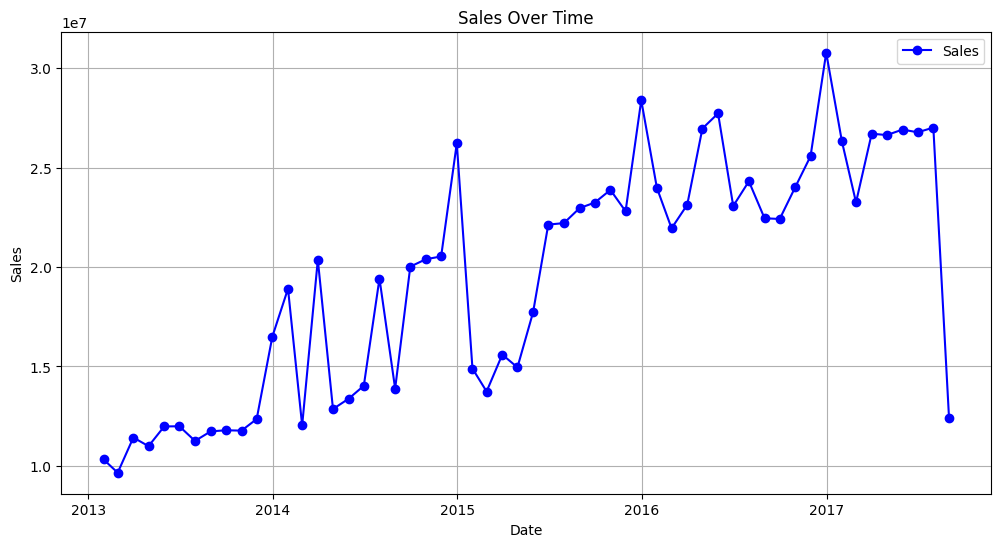

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(train_monthly.index, train_monthly['sales'], marker='o', linestyle='-', color='blue', label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

In [55]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

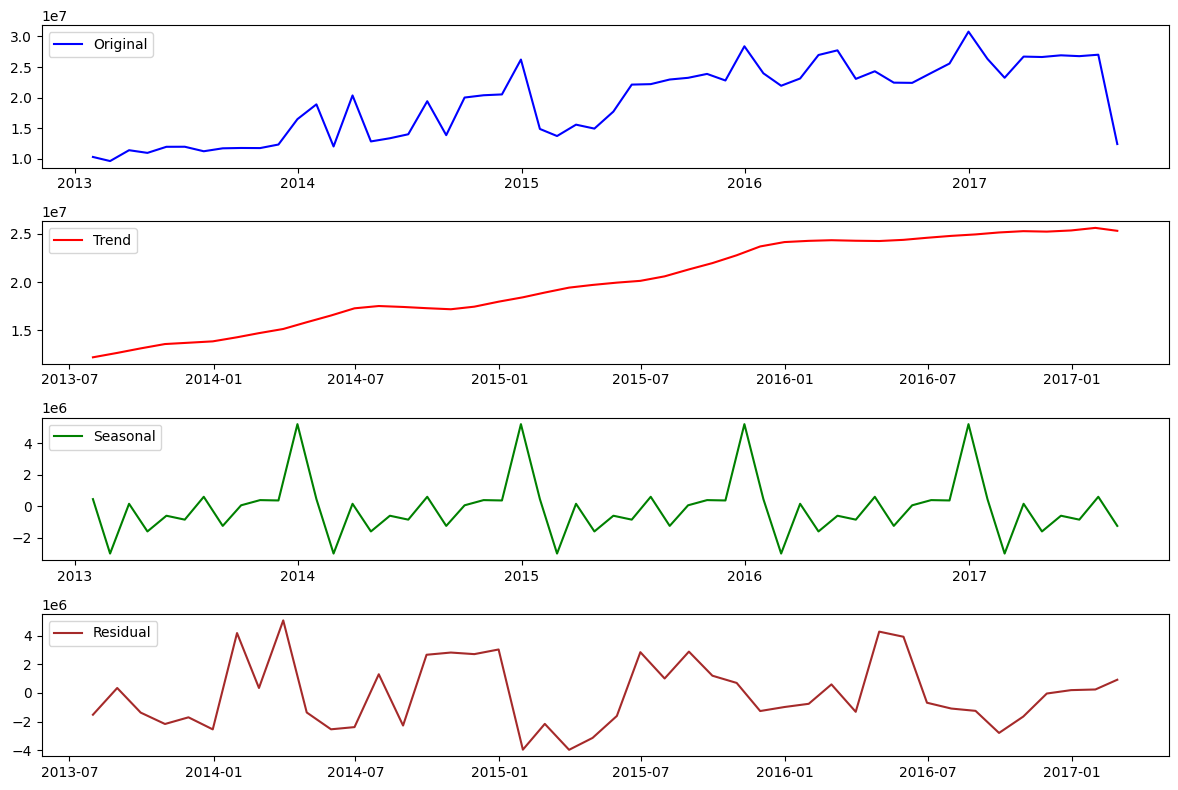

In [56]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(train_monthly['sales'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual', color='brown')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [57]:
# Calculate the correlation of sales with the other features
correlation_matrix = train_daily.corr()
sales_correlation = correlation_matrix['sales']

print(sales_correlation)

sales              1.000000
onpromotion        0.585179
cluster            0.398309
type_Additional    0.232478
type_Bridge        0.071005
type_Event         0.142656
type_Holiday       0.120201
type_Transfer      0.078842
type_Work Day      0.042376
locale_Local       0.120596
locale_National    0.240382
locale_Regional    0.094259
oil_price         -0.581178
Name: sales, dtype: float64


Most correlated features:- onpromotion,oil_price

But according to this locale is not correlated to sales.

In [58]:
# Adding holidays to one column
train_daily['holiday_sum'] = train_daily[['type_Additional','type_Bridge','type_Event','type_Holiday','type_Transfer','type_Work Day']].sum(axis=1)

In [59]:
train_daily

,sales,onpromotion,cluster,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional,oil_price,holiday_sum
date,,,,,,,,,,,,,,
2013-01-01,2511.618999,0,15114,0.0,0.0,0.0,1782.0,0.0,0.0,0.0,1782.0,0.0,93.14,1782.0
2013-01-02,496092.417944,0,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.14,0.0
2013-01-03,361461.231124,0,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.97,0.0
2013-01-04,354459.677093,0,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.12,0.0
2013-01-05,477350.121229,0,15114,0.0,0.0,0.0,0.0,0.0,1782.0,0.0,1782.0,0.0,93.12,1782.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,826373.722022,14179,15114,0.0,0.0,0.0,0.0,1782.0,0.0,0.0,1782.0,0.0,48.81,1782.0
2017-08-12,792630.535079,8312,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.81,0.0
2017-08-13,865639.677471,9283,15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.81,0.0


In [60]:
# Calculate the correlation of sales with the other features
correlation_matrix = train_daily.corr()
sales_correlation = correlation_matrix['sales']

print(sales_correlation)

sales              1.000000
onpromotion        0.585179
cluster            0.398309
type_Additional    0.232478
type_Bridge        0.071005
type_Event         0.142656
type_Holiday       0.120201
type_Transfer      0.078842
type_Work Day      0.042376
locale_Local       0.120596
locale_National    0.240382
locale_Regional    0.094259
oil_price         -0.581178
holiday_sum        0.271223
Name: sales, dtype: float64


Features that are needed to add forecasting model :-  onpromotion, oil_price

In [61]:
# drop least correlated features
train_daily = train_daily.drop(columns=['cluster','type_Additional','type_Bridge','type_Event','type_Holiday','type_Transfer','type_Work Day','locale_Local','locale_National','locale_Regional','holiday_sum'])
train_daily

,sales,onpromotion,oil_price
date,,,
2013-01-01,2511.618999,0,93.14
2013-01-02,496092.417944,0,93.14
2013-01-03,361461.231124,0,92.97
2013-01-04,354459.677093,0,93.12
2013-01-05,477350.121229,0,93.12
...,...,...,...
2017-08-11,826373.722022,14179,48.81
2017-08-12,792630.535079,8312,48.81
2017-08-13,865639.677471,9283,48.81


In [62]:
# !pip install pmdarima

In [64]:
# # Import the library
# from pmdarima import auto_arima

# warnings.filterwarnings("ignore")

# # Fit auto_arima function 
# stepwise_fit = auto_arima(train_daily['sales'], start_p = 1, start_q = 1,
#                           max_p = 3, max_q = 3, m = 365,
#                           start_P = 0, seasonal = True,
#                           d = None, D = 1, trace = True,
#                           error_action ='ignore',
#                           suppress_warnings = True,
#                           stepwise = True)           # set to stepwise
  
# # To print the summary
# stepwise_fit.summary()

In [65]:
train_daily.isnull().sum()

sales          0
onpromotion    0
oil_price      4
dtype: int64

There are missing values, because I concatanate 2 dataframes ealier.

Lets handle the missing values;

In [66]:
train_daily['oil_price'] = train_daily['oil_price'].fillna(method='ffill')

In [67]:
# Split data into train - test sets
split_date = pd.to_datetime('2016-08-15')

sarima_train = train_daily.iloc[train_daily.index < split_date]
sarima_test = train_daily.iloc[train_daily.index >= split_date]

In [68]:
# train_daily

In [69]:
# test.describe()

In [ ]:
import statsmodels.api as sm

# Define SARIMA model with exogenous variable (oil prices)
sarima_model = sm.tsa.SARIMAX(sarima_train['sales'], exog=sarima_train[['oil_price','onpromotion']], 
                              order=(3, 0, 0), 
                              seasonal_order=(2, 1, 1, 365))

# Fit the SARIMA model
results = sarima_model.fit()

## Predicting the test sales

In [ ]:
# prediction
forecast_steps = len(sarima_test)
forecast = results.get_forecast(steps=forecast_steps, exog=sarima_test[['onpromotion', 'oil_price']])

In [ ]:
# plot the predicted and true sales in same plot for visualization the results
predicted_sales = forecast.predicted_mean

plt.plot(sarima_test.index, sarima_test['sales'] , label='True Sales', marker='o', color='blue')
plt.plot(sarima_test.index, predicted_sales , label='Predicted Sales',marker='o',color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
sarima_test